2000 random points, the first half contains the given points and the second half the queries
kdtree= 0.10956836199966347
bruteforce= 1.890804843999831
[164, 9, 8]
[176, 12, 13]


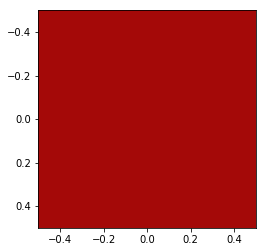

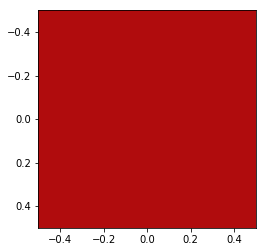

In [180]:
import matplotlib.pyplot as plt
import random
from collections import namedtuple
from operator import itemgetter
import timeit

n = 2000

def distance(v1, v2):
    res = 0
    for i in range(0, len(v1)):
        res = res + (v1[i]-v2[i])*(v1[i]-v2[i])
    
    return res

def generate():
    points = []

    for i in range(n):
        points.append([random.randint(0,255) for i in range(3)])

    return points


def bruteforce(points):
    res = []
    
    for q in range(n//2, n):
        best = 0
        for p in range(0,n//2):
            if distance(points[p], points[q])<distance(points[best], points[q]):
                best = p
        
        res.append(points[best])
    
    return res

def kdtree(points):
    class Node(namedtuple('Node', 'axis point left_child right_child')):
        """a node"""
    
    def build_kdtree(points, depth=0):
        try:
            d = len(points[0])
        except IndexError as e:
            return None
        
        axis = depth % d
        points.sort(key=itemgetter(axis))
        
        mid = len(points)//2
        
        return Node(
            axis=axis,
            point=points[mid],
            left_child=build_kdtree(points[:mid], depth+1),
            right_child=build_kdtree(points[mid+1:], depth+1)
        )
    
    root = build_kdtree(points[:n//2])
    
    def query(node, point, _best=None):
        if node is None:
            return _best
        
        if _best is None:
            _best = node.point

        if distance(point,_best)>distance(point,node.point):
            _best = node.point
            
        if node.point[node.axis]<=point[node.axis]:
            _best = query(node.right_child, point, _best)
        else:
            _best = query(node.left_child, point, _best)
        
        projection = list(point)
        projection[node.axis]=node.point[node.axis]
        
        if distance(point, projection)<distance(point, _best):
            if node.point[node.axis]<=point[node.axis]:
                _best = query(node.left_child, point, _best)
            else:
                _best = query(node.right_child, point, _best)

        return _best
    
 
    
    res = []
    for i in range(n//2, n):
        res.append(query(root, points[i]))
       
    return res

points = generate()

print(n, "random points, the first half contains the given points and the second half the queries")
print("kdtree=", timeit.timeit("kdtree(points)", setup="from __main__ import kdtree, points", number=1))
print("bruteforce=", timeit.timeit("bruteforce(points)", setup="from __main__ import bruteforce, points", number=1))

def show(color):
    cpy=list(color)
    cpy[0] = cpy[0]/255
    cpy[1] = cpy[1]/255
    cpy[2] = cpy[2]/255
    
    print(color)
    
    plt.figure()
    plt.imshow([[cpy]])

res1=kdtree(points)
    
show(res1[0])
show(points[n//2])